In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({
  "text.usetex": True,
  "font.sans-serif": ["Helvetica"]})

# Driving forces for moving systems

In this case study, you want to accelerate a 0.1-kg flywheel with a
piston. The desired
acceleration of the flywheel is $\alpha=50~rad/s^2.$ The piston is
attached to the link and creates a horizontal driving force. This
example demonstrates how we can describe constraints in mathematical
forms. 

We have two moving bodies:

1. a flywheel with radius $r=0.2~m$ and mass $m=0.1~kg$
2. a massless connecting link

Both objects move in a horizontal plane, so their positions have two
degrees of freedom to describe position and one degree of freedom that
describes orientation. 

$DOF = 3 + 3 = 6$

In [18]:
from IPython.core.display import SVG

SVG(filename='./images/piston-flywheel.svg')

FileNotFoundError: [Errno 2] No such file or directory: './images/piston-flywheel.svg'

## Describing constraints 

There are six degrees of freedom for a flywheel and a link, but there
are 6 constraints on the system's motion:

1. the flywheel is pinned to the ground in the x-dir
1. the flywheel is pinned to the ground in the y-dir
2. the top of the link is pinned to the flywheel
2. the top of the link is pinned to the flywheel
3. the bottom of the link slides along the horizontal line
4. the angle of the flywheel has acceleration, $\alpha=50~rad/s^2$

$system~DOF = 6 - 6 = 0~DOF$

> __Note:__ In general, a pin in a planar system creates 2 constraints on motion.

You should recognize at this point that there are _0 differential
equations to solve_. Once you have calculated the kinematics based upon
the system constraints, you can plug in the values and solve for force
of the piston. So, start with the kinematic description of motion. 

$\mathbf{r}_2 =\mathbf{r}_{2/3} + \mathbf{r}_3$

In [19]:
SVG(filename = './images/flywheel-constraints.svg')

FileNotFoundError: [Errno 2] No such file or directory: './images/flywheel-constraints.svg'

$r(\sin\theta\hat{i} - \cos\theta \hat{j}) =
-L(\cos\theta_{L}\hat{i}-\sin\theta_L\hat{j}) + d\hat{i}$

this description creates two independent equations

1. $-r\sin\theta = -L\cos\theta_{L}+ d$
2. $r\cos\theta = -L\sin\theta_L$

The constraint on $\theta$ says that $\theta(t)=\frac{\alpha t^2}{2}$.
You need to solve for $\theta_L$ and $d$ to determine the full
state of the system. 

$\theta_L = \sin^{-1}\left(\frac{r}{L}\cos\theta\right)$

$d = L\cos\theta_{L}-r\sin\theta$

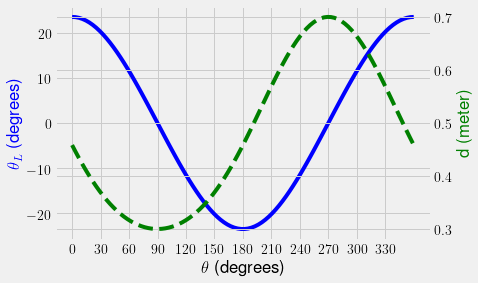

In [32]:
r = 0.2
L = 0.5
theta = np.linspace(0,2*np.pi,100)
thetaL = np.arcsin(r/L*np.cos(theta))
d = L*np.cos(thetaL)-r*np.sin(theta)
f, ax = plt.subplots()
ax.plot(theta*180/np.pi, thetaL*180/np.pi,'b-',label = r'\theta_L')
ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel(r'$\theta_L$ (degrees)',color = 'blue')
plt.xticks(np.arange(0,360,30))
ax2 = ax.twinx()
ax2.plot(theta*180/np.pi, d, 'g--', label = 'piston d')
ax2.set_ylabel('d (meter)', color = 'green');
plt.show()

---
### Exercise:
What is the angular velocity and angular acceleration of the link?
$\dot{\theta}_L$ and $\ddot{\theta}_L$

---

Now, we have solved all of the kinematics we need to
solve for the applied piston force. Sometimes, you can
look at the Newton-Euler equations for the syatem as a
whole, but here we need to separate each component and
sum forces and moments. 

Flywheel:

$\sum\mathbf{F}=\mathbf{0}$

$\sum M_G = I \alpha$

> __Note:__ If a body is moving, you either have to sum moments about a fixed point or its center of mass. Otherwise, the description of angular acceleration is more involved.

Link:

$\sum\mathbf{F}=\mathbf{0}$

$\sum M = 0$

> __Note:__ when links, cables, or pulleys are assumed to
> be massless they still obey Newtonian mechanics, but
> momentum is always zero. So the sum of forces or
> moments is equal to 0.

The three kinetic equations for the wheel are as such,

1. $\sum \mathbf{F}\cdot\hat{i} = F_{2x}+F_{1x} = 0$
2. $\sum \mathbf{F}\cdot\hat{j} = F_{2y}+F_{1y} = 0$
3. $\sum M_{1} = r\hat{e}_r \times (F_{2x}\hat{i}+F_{2y}\hat{j}) = \frac{mr^2}{2}\alpha$

and the three kinetic equations for the link are as such,

1. $\sum \mathbf{F}\cdot\hat{i} = R-F_{2x} = 0$
2. $\sum \mathbf{F}\cdot\hat{j} = -F_{2y} - F_{piston} = 0$
3. $\sum M_{2} = L\hat{b}_1 \times (-F_{piston}\hat{i} + R\hat{j}) = 0$

The third equation for the link is rearranged to solve for $R =
F\tan\theta_L$. The third equation for the flywheel is rearranged to
solve for $F$ as such

$rF\cos\theta -rF\tan\theta_L\sin\theta = \frac{mr^2}{2}\alpha$

finally arriving at

$F = \frac{mr\alpha}{2}\left(\cos\theta-\tan\theta_L\sin\theta
\right)^{-1}$

Plotted below as a function of flywheel angle, $\theta$,

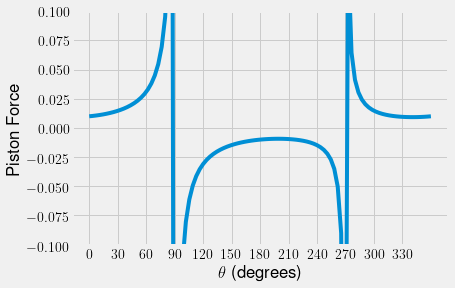

In [31]:
m = 0.1
F = m*r/2*(np.cos(theta)-np.tan(thetaL)*np.sin(theta))**(-1)
plt.plot(theta*180/np.pi, F)
plt.ylim(-0.1,0.1)
plt.xticks(np.arange(0,360,30))
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Piston Force');
